In [1]:
import predictit_markets as pm
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
df = pm.market_data(8089)
print(df.head())

   marketId  contractId contractName                 date  dateString  \
0      8089       31414      Shapiro  2024-07-21T00:00:00  2024-07-21   
1      8089       31414      Shapiro  2024-07-22T00:00:00  2024-07-22   
2      8089       31414      Shapiro  2024-07-23T00:00:00  2024-07-23   
3      8089       31414      Shapiro  2024-07-24T00:00:00  2024-07-24   
4      8089       31414      Shapiro  2024-07-25T00:00:00  2024-07-25   

   openSharePrice  highSharePrice  lowSharePrice  closeSharePrice  \
0            0.50            0.50           0.20             0.25   
1            0.25            0.38           0.24             0.33   
2            0.33            0.34           0.21             0.23   
3            0.23            0.43           0.19             0.30   
4            0.30            0.31           0.25             0.26   

   tradeVolume lineColor  
0        19192   #0D8ECF  
1       341015   #0D8ECF  
2       230304   #0D8ECF  
3       392292   #0D8ECF  
4       117

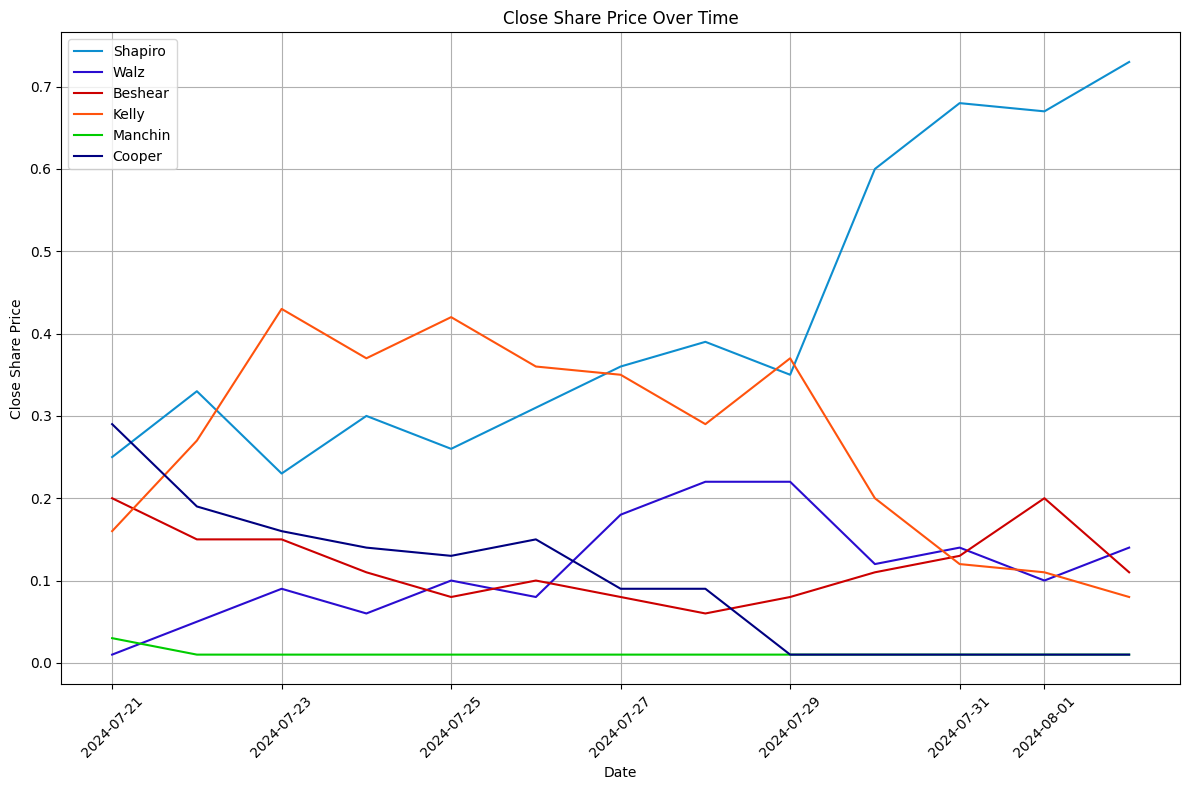

In [3]:
# Convert the date column to datetime format for plotting
df['date'] = pd.to_datetime(df['date'])

# Plotting line plots for each contract
plt.figure(figsize=(12, 8))

# Loop through each unique contractName to plot them separately
for contract in df['contractName'].unique():
    contract_data = df[df['contractName'] == contract]
    plt.plot(contract_data['date'], contract_data['closeSharePrice'], label=contract, color=contract_data['lineColor'].iloc[0])

plt.title('Close Share Price Over Time')
plt.xlabel('Date')
plt.ylabel('Close Share Price')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

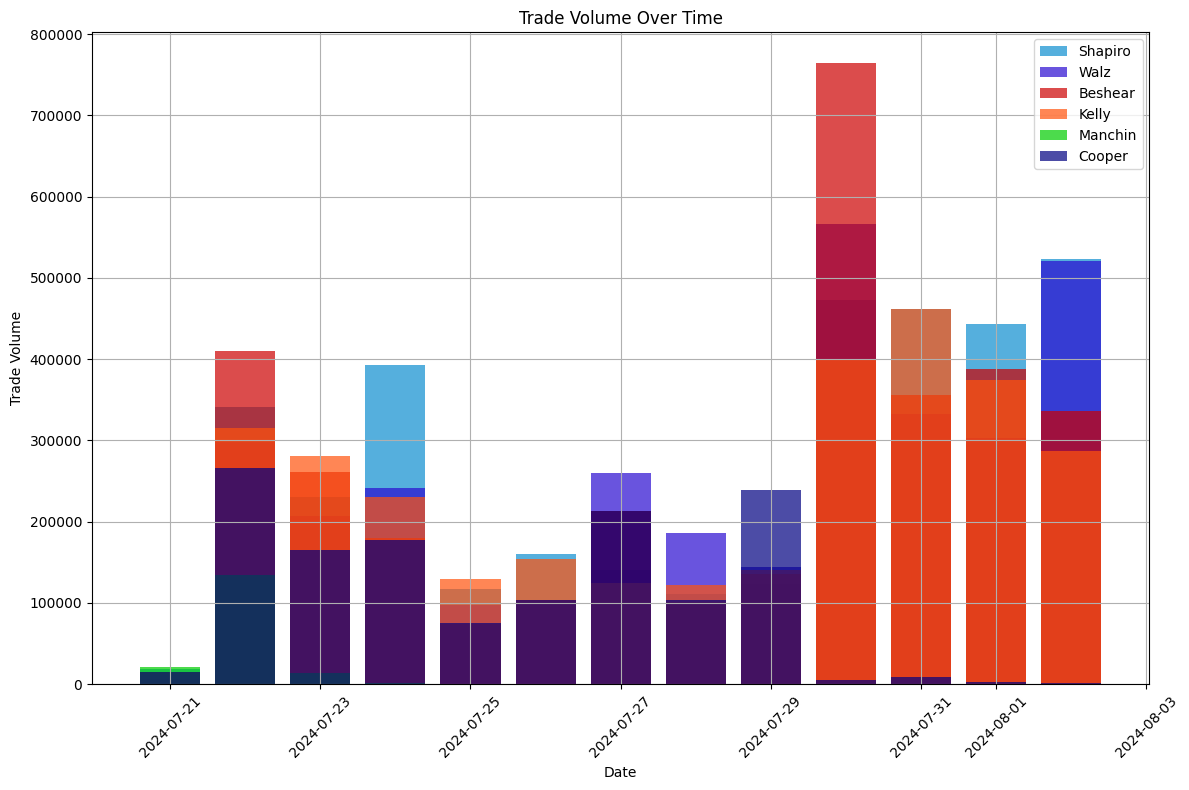

In [4]:
plt.figure(figsize=(12, 8))

# Plotting trade volume as bar plots for each contract
for contract in df['contractName'].unique():
    contract_data = df[df['contractName'] == contract]
    plt.bar(contract_data['date'], contract_data['tradeVolume'], label=contract, color=contract_data['lineColor'].iloc[0], alpha=0.7)

plt.title('Trade Volume Over Time')
plt.xlabel('Date')
plt.ylabel('Trade Volume')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

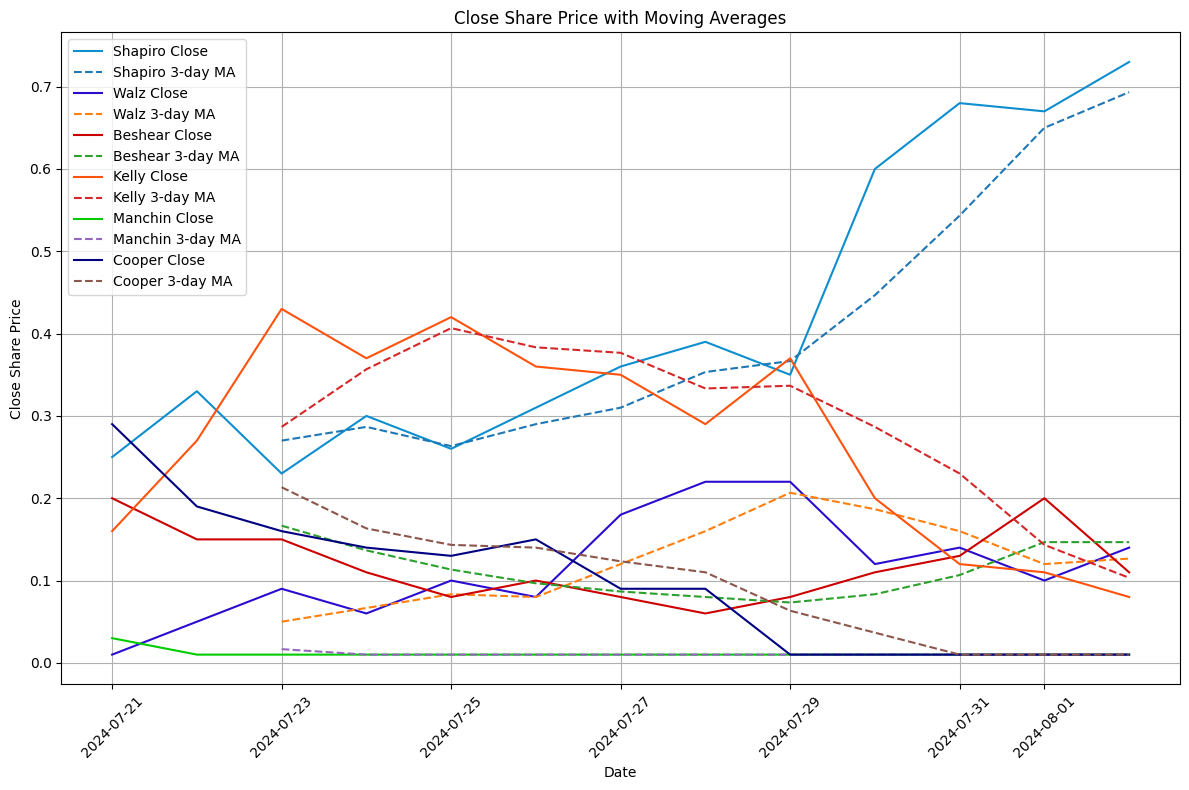

In [5]:
def plot_moving_average(data, window, contract_name):
    rolling_mean = data['closeSharePrice'].rolling(window=window).mean()
    plt.plot(data['date'], rolling_mean, label=f'{contract_name} {window}-day MA', linestyle='--')

plt.figure(figsize=(12, 8))

# Loop through each contract to plot moving averages
for contract in df['contractName'].unique():
    contract_data = df[df['contractName'] == contract]
    plt.plot(contract_data['date'], contract_data['closeSharePrice'], label=f'{contract} Close', color=contract_data['lineColor'].iloc[0])
    plot_moving_average(contract_data, window=3, contract_name=contract)

plt.title('Close Share Price with Moving Averages')
plt.xlabel('Date')
plt.ylabel('Close Share Price')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()